高卒100%はおかしい（Over18とEdu）
残業時間の調整

In [ ]:
#インポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# ファイルパスを指定
train_file = 'train.csv'
test_file  = 'test.csv'

# データの読み込み
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# データの確認
print("Train Dataset:")
display(train_df[~train_df['Over18'].isin(['Y', 'N'])].head())
print("\nTest Dataset:")
display(test_df[~test_df['Over18'].isin(['Y', 'N'])].head())

# カラム名を変更
column_mapping = {
    'id'                      : 'ID',                 # インデックスとして使用
    'Age'                     : 'Age',                # 年齢
    'BusinessTravel'          : 'BT',                 # 出張 (1=出張なし, 2=頻繁に出張, 3=たまに出張)
    'DailyRate'               : 'DR',                 # 給与レベル
    'Department'              : 'Dept',               # 部署 (1=人事, 2=研究開発, 3=営業)
    'DistanceFromHome'        : 'DistHome',           # 通勤距離
    'Education'               : 'Edu',                # 学歴 (1=高校以下, 2=大学, 3=学士, 4=修士, 5=博士)
    'EducationField'          : 'EduField',           # 専攻 (1=人事, 2=生命科学, 3=マーケティング, 4=医療科学, 5=その他, 6=技術)
    'EnvironmentSatisfaction' : 'EnvSat',             # 環境満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'Gender'                  : 'Gender',             # 性別 (1=女性, 2=男性)
    'HourlyRate'              : 'HR',                 # 時給
    'JobInvolvement'          : 'JobInv',             # 仕事熱心度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'JobLevel'                : 'JobLvl',             # 職位
    'JobRole'                 : 'JobRole',            # 職種
    'JobSatisfaction'         : 'JobSat',             # 職務満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'MaritalStatus'           : 'MarStat',            # 結婚状況 (1=離婚, 2=既婚, 3=未婚)
    'MonthlyIncome'           : 'MonthlyInc',         # 月給
    'NumCompaniesWorked'      : 'NumComp',            # 何社目の会社であるか
    'Over18'                  : 'Over18',             # 18歳以上 (1=はい, 2=いいえ)
    'OverTime'                : 'OT',                 # 残業 (1=なし, 2=あり)
    'PercentSalaryHike'       : 'PercentSalHike',     # 給与増加率
    'PerformanceRating'       : 'PerfRating',         # 業績評価
    'RelationshipSatisfaction': 'RelSat',             # 人間関係満足度
    'StandardHours'           : 'StdHours',           # 標準労働時間
    'StockOptionLevel'        : 'StockOptLvl',        # ストックオプションレベル
    'TotalWorkingYears'       : 'TotalWorkYrs',       # 総勤務年数
    'TrainingTimesLastYear'   : 'TrainTimesLastYr',   # 昨年の訓練回数
    'WorkLifeBalance'         : 'WLB',                # ワークライフバランス
    'YearsAtCompany'          : 'YrsAtCompany',       # 勤続年数
    'YearsInCurrentRole'      : 'YrsInCurrRole',      # 現職の年数
    'YearsSinceLastPromotion' : 'LastPromo',          # 最終昇進からの年数
    'YearsWithCurrManager'    : 'WithCurrMgr',        # 現マネージャーとの年数
    'Attrition'               : 'Attrition'           # 離職 (0=なし, 1=あり)
}


train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# カテゴリーマッピング
business_travel_map = {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3}
department_map      = {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3}
gender_map          = {'Female': 1, 'Male': 2}
MarStat_map         = { 'Divorced': 1, 'Married': 2, 'Single': 3}
Over18_map          = {'Y': 1, 'N': 2}
OT_map              = {'No': 1, 'Yes': 2}

# int型に変換
train_df['BT']      = train_df['BT'].map(business_travel_map).astype(int)
train_df['Dept']    = train_df['Dept'].map(department_map)   .astype(int)
train_df['Gender']  = train_df['Gender'].map(gender_map)     .astype(int)
train_df['MarStat'] = train_df['MarStat'].map(MarStat_map)   .astype(int)
train_df['Over18']  = train_df['Over18'].map(Over18_map)     .astype(int)
train_df['OT']      = train_df['OT'].map(OT_map)             .astype(int)
train_df['Attrition'] = train_df['Attrition'].astype(int)

test_df['BT']       = test_df['BT'].map(business_travel_map) .astype(int)
test_df['Dept']     = test_df['Dept'].map(department_map)    .astype(int)
test_df['Gender']   = test_df['Gender'].map(gender_map)      .astype(int)
test_df['MarStat']  = test_df['MarStat'].map(MarStat_map)    .astype(int)
test_df['Over18']   = test_df['Over18'].map(Over18_map)      .astype(int)
test_df['OT']       = test_df['OT'].map(OT_map)              .astype(int)




# Attrition ==１の数を集計
attrition_education_counts = train_df[train_df['Attrition'] == 1]['EduField'].value_counts().sort_values()
attrition_jobrole_counts = train_df[train_df['Attrition'] == 1]['JobRole'].value_counts().sort_values()

# 個数が少ないものから数値に置き換えるためのマッピングを作成
education_map = {edu: idx+1 for idx, edu in enumerate(attrition_education_counts.index)}
jobrole_map = {job: idx+1 for idx, job in enumerate(attrition_jobrole_counts.index)}

# Edu列を数値に置き換え
train_df['EduField'] = train_df['EduField'].map(education_map).astype(int)
test_df['EduField'] = test_df['EduField'].map(education_map).astype(int)

# Job列を数値に置き換え
train_df['JobRole'] = train_df['JobRole'].map(jobrole_map).astype(int)
test_df['JobRole'] = test_df['JobRole'].map(jobrole_map).astype(int)

# 変換後のデータを確認
# 全ての列が表示されるように設定する
pd.set_option('display.max_columns', None)  # 全ての列を表示
pd.set_option('display.max_rows', None)     # 全ての行を表示
print("Train Dataset:")
display(train_df.head())
print("\nTest Dataset:")
display(test_df.head())


Train Dataset:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition



Test Dataset:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Train Dataset:


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PercentSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr,Attrition
0,0,26,3,450.941476,2,7.601074,3,5,4,2,43,2,1,8,2,3,16307,1,1,1,13,3,3,80,0,1,3,2,11,8,7,0,0
1,3,47,3,730.235896,2,26.739489,3,2,2,2,98,2,1,9,1,1,9526,8,1,2,11,3,3,80,1,20,1,1,5,9,4,4,0
2,7,26,3,1082.560066,1,7.374739,3,6,2,2,84,2,1,3,2,2,10596,8,1,1,18,3,2,80,1,4,3,3,3,2,0,2,0
3,10,46,3,706.247579,2,14.791373,1,5,1,1,79,2,1,8,3,1,5762,0,1,2,20,4,4,80,1,6,0,1,5,4,7,7,1
4,11,25,3,500.610860,2,2.146966,4,5,2,2,98,3,2,5,3,1,17068,6,1,2,14,3,2,80,1,8,3,3,1,0,0,0,0



Test Dataset:


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PercentSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr
0,1,34,2,358.039056,2,9.926847,3,6,1,1,73,3,1,9,4,1,5677,0,1,1,11,3,3,80,1,11,2,3,7,7,2,7
1,2,37,3,749.376719,2,10.391959,3,5,1,2,78,3,1,8,1,2,4107,1,1,1,13,3,4,80,0,5,3,2,1,3,1,0
2,4,34,2,958.484177,2,3.297025,3,6,2,1,73,3,3,1,4,1,9907,7,1,1,16,3,3,80,1,21,2,2,4,3,1,4
3,5,34,3,79.174592,2,2.430032,4,5,3,1,53,3,5,4,3,3,9907,0,1,1,13,3,4,80,3,9,3,3,20,6,1,4
4,6,29,3,943.191218,2,10.017149,2,6,3,2,77,3,2,1,2,1,1611,4,1,1,12,3,3,80,1,25,2,4,1,7,0,0


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PercentSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000,1200.00000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,2.565833,750.754157,2.279167,10.227814,2.853333,4.829167,2.655833,1.594167,66.261667,2.716667,2.125833,6.015833,2.717500,2.080000,7052.521667,2.614167,1.0,1.265000,15.115000,3.11000,2.616667,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,0.679007,415.420917,0.527381,8.128817,1.060390,1.337837,1.139502,0.491257,20.257801,0.675847,1.185821,2.506489,1.091797,0.715793,5033.677026,2.460422,0.0,0.441517,3.632415,0.31302,1.066460,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,1.000000,59.231581,1.000000,0.044009,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1052.000000,0.000000,1.0,1.000000,11.000000,3.00000,1.000000,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,2.000000,403.946043,2.000000,2.694356,2.000000,4.000000,2.000000,1.000000,48.000000,2.000000,1.000000,5.000000,2.000000,2.000000,3537.000000,1.000000,1.0,1.000000,12.000000,3.00000,2.000000,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,3.000000,736.873463,2.000000,9.372775,3.000000,5.000000,3.000000,2.000000,67.000000,3.000000,2.000000,6.000000,3.000000,2.000000,5071.000000,1.000000,1.0,1.000000,14.000000,3.00000,3.000000,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,3.000000,1092.443495,3.000000,15.231438,4.000000,6.000000,4.000000,2.000000,84.000000,3.000000,3.000000,8.000000,4.000000,3.000000,8715.250000,4.000000,1.0,2.000000,18.000000,3.00000,3.250000,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,3.000000,1484.979305,3.000000,29.890208,5.000000,6.000000,4.000000,2.000000,100.000000,4.000000,5.000000,9.000000,4.000000,3.000000,19833.000000,9.000000,1.0,2.000000,25.000000,4.00000,4.000000,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PercentSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,979.136250,33.22750,2.568750,714.512398,2.286250,9.834908,2.832500,4.903750,2.713750,1.590000,67.69375,2.733750,2.06750,6.002500,2.732500,2.107500,7035.415000,2.700000,1.0,1.268750,15.393750,3.140000,2.717500,80.0,0.876250,10.530000,2.836250,2.696250,6.090000,3.911250,2.060000,3.705000
std,579.901688,8.15806,0.693451,418.682914,0.507082,8.146464,1.092445,1.272403,1.127342,0.492141,20.33856,0.678923,1.13338,2.482478,1.095419,0.720481,5093.122788,2.528931,0.0,0.443587,3.716985,0.347204,1.033939,0.0,0.881423,7.661428,1.254553,0.685254,4.858643,3.524401,3.218983,3.350299
min,1.000000,17.00000,1.000000,59.071522,1.000000,0.140883,1.000000,1.000000,1.000000,1.000000,30.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1563.000000,0.000000,1.0,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,482.750000,26.00000,2.000000,375.148459,2.000000,2.667125,2.000000,4.000000,2.000000,1.000000,48.75000,2.000000,1.00000,5.000000,2.000000,2.000000,3339.000000,1.000000,1.0,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,981.500000,34.00000,3.000000,706.465120,2.000000,8.444392,3.000000,5.000000,3.000000,2.000000,70.50000,3.000000,2.00000,6.000000,3.000000,2.000000,4938.500000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1468.000000,37.00000,3.000000,1040.241914,3.000000,14.080546,4.000000,6.000000,4.000000,2.000000,85.00000,3.000000,3.00000,8.000000,4.000000,3.000000,8268.000000,4.000000,1.0,2.000000,18.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,1999.000000,58.00000,3.000000,1483.430375,3.000000,30.041884,5.000000,6.000000,4.000000,2.000000,100.00000,4.000000,5.00000,9.000000,4.000000,3.000000,19973.000000,9.000000,1.0,2.000000,25.000000,4.000000,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,31.000000,16.000000,15.000000,17.000000


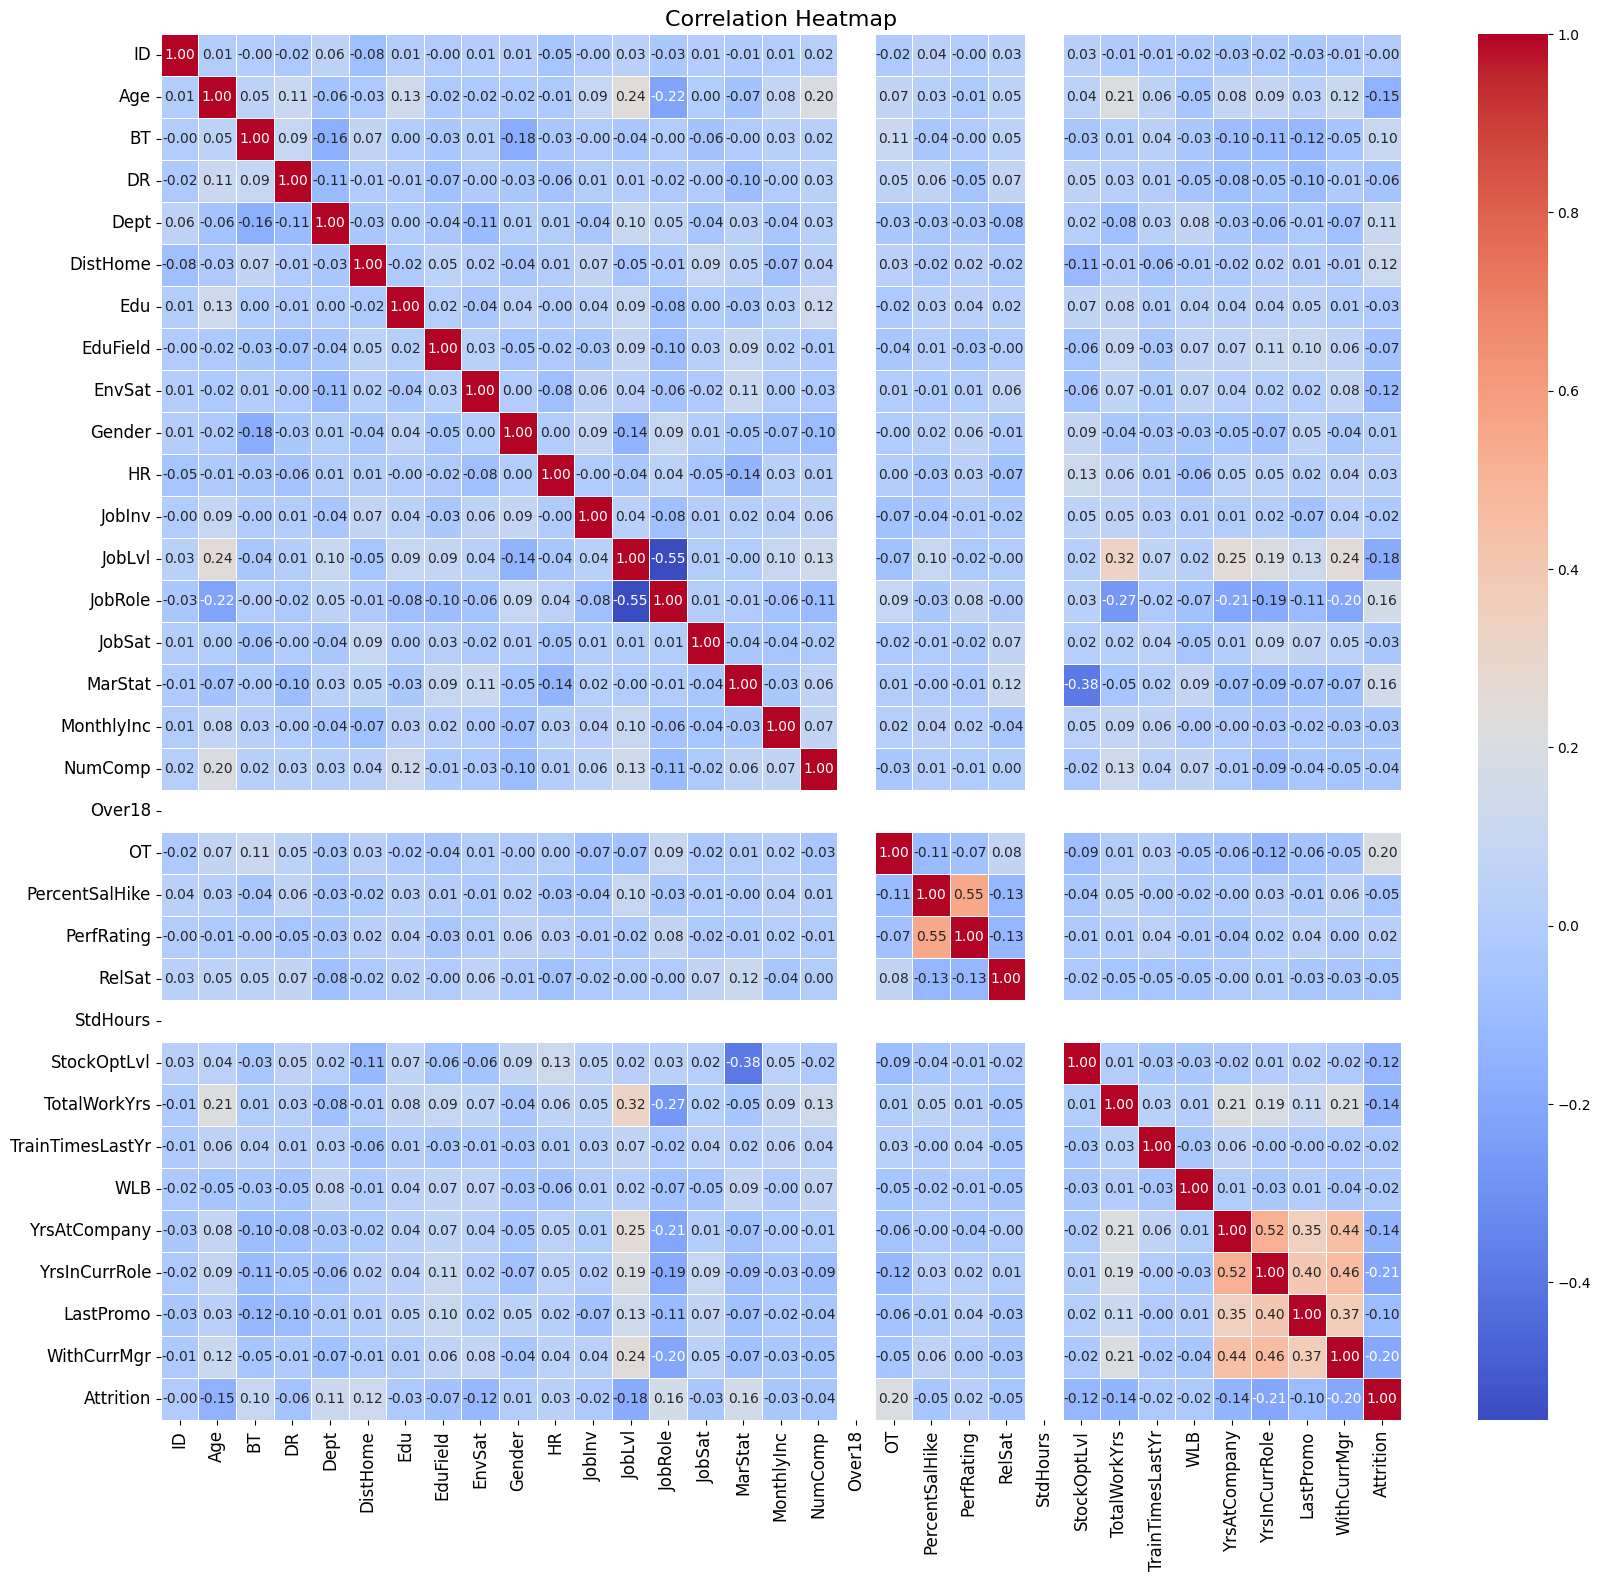

Number of entries with Over18 column value of 2:
Series([], Name: count, dtype: int64)
Number of entries with StdHours column not equal to 80:
Series([], Name: count, dtype: int64)


In [ ]:
'''
# 17歳以下のAgeを中央値に置き換え
train_df.loc[train_df['Age'] < 0, 'Age'] = train_df.loc[train_df['Age'] > 0, 'Age'].median()
test_df.loc[test_df['Age'] < 0, 'Age'] = test_df.loc[test_df['Age'] > 0, 'Age'].median()
'''
'''
# `DistHome`列の0未満の値を持つ行の平均値を計算
mean_value = train_df.loc[train_df['DistHome'] > 0, 'DistHome'].mean()

# `DistHome`列の0未満の値を平均値で置き換え
train_df.loc[train_df['DistHome'] <= 0, 'DistHome'] = mean_value
'''

# DistHomeの0未満の値を中央値で置き換え
train_df.loc[train_df['DistHome'] < 0, 'DistHome'] = train_df.loc[train_df['DistHome'] > 0, 'DistHome'].median()
'''
# IDとAttrition以外の列を選択
features = [col for col in train_df.columns if col not in ['id', 'Attrition', 'DistHome']]

# 0未満の値を予測対象にする
predict_df = train_df[train_df['DistHome'] < 0]
train_df_valid = train_df[train_df['DistHome'] >= 0]

# 特徴量とターゲットに分ける
X_train = train_df_valid[features]
y_train = train_df_valid['DistHome']
X_predict = predict_df[features]

# ランダムフォレスト回帰モデルの作成と訓練
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 予測
predicted_values = rf_model.predict(X_predict)

# 予測結果を元のデータフレームに戻す
train_df.loc[train_df['DistHome'] < 0, 'DistHome'] = predicted_values
'''


# 基本統計量の表示
display(train_df.describe())
display(test_df.describe())

# 相関行列を計算
corr_matrix = train_df.corr()

# ヒートマップを作成
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# データの偏りの確認
print('Number of entries with Over18 column value of 2:')
print(train_df[train_df['Over18'] == 2]['Over18'].value_counts().sort_values())
print('Number of entries with StdHours column not equal to 80:')
print(train_df[train_df['StdHours'] != 80]['StdHours'].value_counts().sort_values())



Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.8750


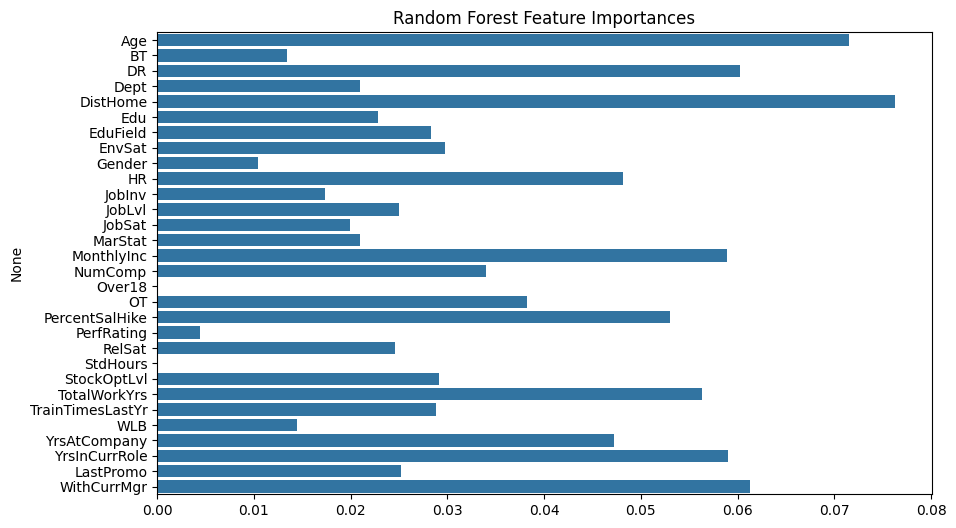

   ID  Attrition
0   1          0
1   2          0
2   4          0
3   5          0
4   6          0
Random Forest Submission file created successfully.


'\nimport numpy as np\nfrom sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split, cross_val_score\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# 訓練データとテストデータの分割\nX = train_df.drop([\'ID\', \'Attrition\'], axis=1)  # \'JobRole\'列を除外\ny = train_df[\'Attrition\']\n\n# 初期化\nfeature_counts = range(1, X.shape[1] + 1)\ntrain_accuracies = []\ntest_accuracies = []\nfeature_importances_list = []\n\n# 特徴量の数を変えながらループ\nfor n_features in feature_counts:\n    print(f"Processing {n_features} features...")  # 現在の特徴量数をプリント\n    rfe = RFE(estimator=RandomForestClassifier(random_state=41), n_features_to_select=n_features)\n    rfe.fit(X, y)  # 全データでフィッティング\n    \n    X_rfe = rfe.transform(X)\n    \n    model_rf = RandomForestClassifier(random_state=41)\n    \n    # クロスバリデーションでの精度計算\n    cv_scores = cross_val_score(model_rf, X_rfe, y, cv=5)\n    mean_cv_score = np.mean(cv_scores)\n 

In [ ]:

# ランダムフォレストモデルの初期化と設定
model_rf = RandomForestClassifier(
    random_state=41,             # 乱数シード
    n_estimators=100,            # 決定木の数
    max_depth=None,              # 各決定木の最大深さ
    min_samples_split=2,         # ノードを分割するために必要な最小サンプル数
    min_samples_leaf=1,          # 葉ノードに必要な最小サンプル数
    max_features='sqrt',         # 各決定木で考慮する特徴量の最大数（平方根）
    bootstrap=True,              # ブートストラップサンプルを使用するかどうか
)


# 訓練データとテストデータの分割
X = train_df.drop(['ID', 'Attrition','JobRole'], axis=1) # JobRole列を除外
y = train_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=0.2,
      random_state=41,
)


# ランダムフォレストモデルの訓練
model_rf.fit(X_train, y_train)

# モデルの評価
train_accuracy_rf = model_rf.score(X_train, y_train)
test_accuracy_rf = model_rf.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

# モデルの特徴量の重要度を取得する
feature_importances_rf = model_rf.feature_importances_

# 特徴量の重要度をプロットする
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=X_train.columns)
plt.title('Random Forest Feature Importances')
plt.show()

# テストデータでの予測
X_final_test_rf = test_df.drop(['ID','JobRole'], axis=1)  # 'JobRole'以外の特徴量を取得
y_final_pred_rf = model_rf.predict(X_final_test_rf)

# 予測結果のデータフレームの作成
df_predictions_rf = pd.DataFrame({
    'ID': test_df['ID'],
    'Attrition': y_final_pred_rf
})

# 予測結果のデータフレームの表示
print(df_predictions_rf.head())

# 提出ファイルの保存
df_predictions_rf.to_csv('submission_rf.csv', index=False, header=False)
print("Random Forest Submission file created successfully.")












'''
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 訓練データとテストデータの分割
X = train_df.drop(['ID', 'Attrition'], axis=1)  # 'JobRole'列を除外
y = train_df['Attrition']

# 初期化
feature_counts = range(1, X.shape[1] + 1)
train_accuracies = []
test_accuracies = []
feature_importances_list = []

# 特徴量の数を変えながらループ
for n_features in feature_counts:
    print(f"Processing {n_features} features...")  # 現在の特徴量数をプリント
    rfe = RFE(estimator=RandomForestClassifier(random_state=41), n_features_to_select=n_features)
    rfe.fit(X, y)  # 全データでフィッティング

    X_rfe = rfe.transform(X)

    model_rf = RandomForestClassifier(random_state=41)

    # クロスバリデーションでの精度計算
    cv_scores = cross_val_score(model_rf, X_rfe, y, cv=5)
    mean_cv_score = np.mean(cv_scores)

    train_accuracies.append(mean_cv_score)

    # 現在の訓練精度をプリント
    print(f"Cross-Validated Accuracy: {mean_cv_score:.4f}")

    # 最後の特徴量数での重要度を記録
    if n_features == X.shape[1]:
        model_rf.fit(X_rfe, y)
        feature_importances_rf = model_rf.feature_importances_
        selected_features = X.columns[rfe.support_]
        feature_importances_list.append((selected_features, feature_importances_rf))

# 精度のプロット
plt.figure(figsize=(14, 6))
plt.plot(feature_counts, train_accuracies, label='Cross-Validated Accuracy', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')

# 各点に精度を表示
for i, cv_acc in enumerate(train_accuracies):
    plt.annotate(f"{cv_acc:.4f}", (feature_counts[i], cv_acc), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# 重要度のプロット
if feature_importances_list:
    selected_features, feature_importances_rf = feature_importances_list[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_rf, y=selected_features)
    plt.title('Feature Importances with All Features')
    plt.show()

# 最適な特徴量数でモデルを再訓練
optimal_n_features = np.argmax(train_accuracies) + 1  # 精度が最も高かった特徴量数
print(f"Optimal number of features: {optimal_n_features}")

rfe = RFE(estimator=RandomForestClassifier(random_state=41), n_features_to_select=optimal_n_features)
rfe.fit(X, y)  # 全データでフィッティング

X_final_test = test_df.drop(['ID'], axis=1)  # 'JobRole'以外の特徴量を取得
X_final_test_rfe = rfe.transform(X_final_test)
model_rf = RandomForestClassifier(random_state=41)
model_rf.fit(rfe.transform(X), y)

# テストデータでの予測
y_final_pred_rf = model_rf.predict(X_final_test_rfe)

# 予測結果のデータフレームの作成
df_predictions_rf = pd.DataFrame({
    'ID': test_df['ID'],
    'Attrition': y_final_pred_rf
})

# 予測結果のデータフレームの表示
print(df_predictions_rf.head())

# 提出ファイルの保存
df_predictions_rf.to_csv('submission_rf_rfe_optimized.csv', index=False, header=False)
print("Random Forest Submission file with RFE created successfully.")
'''
